In [1]:
import numpy as np
import pandas as pd 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [2]:
data = pd.read_csv(r"C:\Users\patil\ML_LAB\Assi6\tvmarketing.csv")

In [3]:
data.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [4]:
data.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


<Axes: >

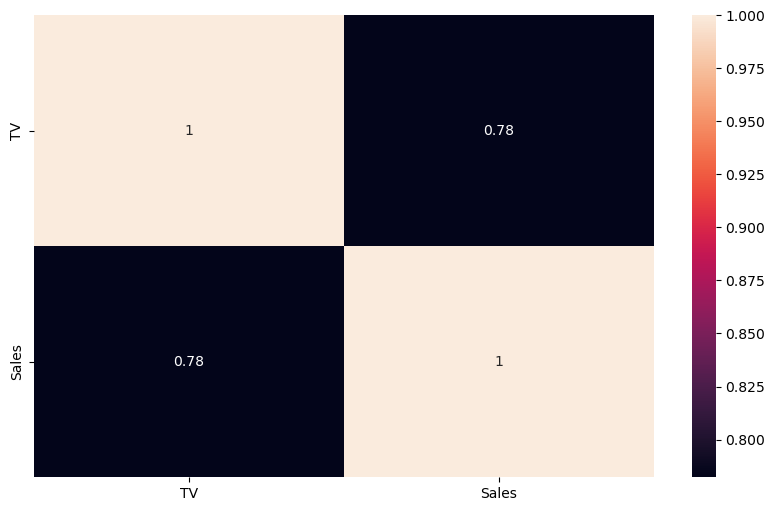

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),annot=True) 

<Figure size 1000x600 with 0 Axes>

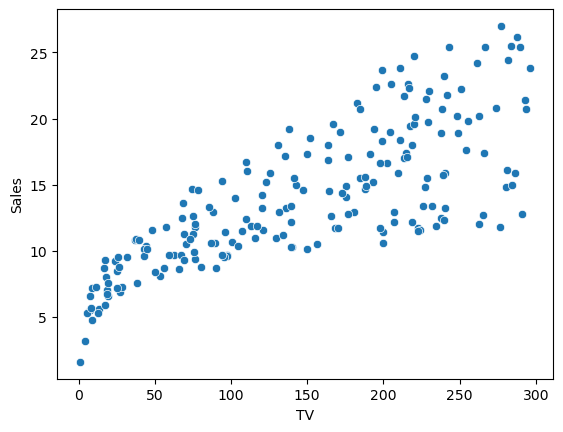

<Figure size 1000x600 with 0 Axes>

In [23]:
sns.scatterplot(x='TV',y='Sales',data=data)
plt.figure(figsize=(10,6))

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_standardized = data.copy()
df_standardized[["TV", "Sales"]] = scaler.fit_transform(data[["TV", "Sales"]])

df_standardized.head()



,TV,Sales
0,0.969852,1.552053
1,-1.197376,-0.696046
2,-1.516155,-0.907406
3,0.052050,0.860330
4,0.394182,-0.215683


In [6]:
X_train,X_test,y_train,y_test = train_test_split(data["TV"],data["Sales"],test_size=0.2,random_state=40)

In [7]:
X_train.shape

(160,)

In [8]:
lr = LinearRegression()

In [9]:
print(X_train.shape, y_train.shape)


(160,) (160,)


In [10]:
# Ensure X_train is a DataFrame and y_train is a 2D array
X_train = X_train.to_frame() if isinstance(X_train, pd.Series) else X_train
y_train = y_train.values.reshape(-1, 1)  # Convert to 2D array

In [11]:
X_train.shape

(160, 1)

In [12]:
lr.fit(X_train,y_train)

LinearRegression()

In [13]:
X_test = pd.DataFrame(X_test, columns=['TV'])  # Ensure column name is the same
y_test = pd.DataFrame(y_test, columns=['Sales'])  # Ensure column name is the same

In [14]:
y_pred = lr.predict(X_test)

In [15]:
r2 = r2_score(y_test,y_pred)

In [16]:
r2

0.5747439963247203

In [17]:
print('MAE',mean_absolute_error(y_test,y_pred))

MAE 2.578910561044354


In [18]:
print('MSE',mean_squared_error(y_test,y_pred))

MSE 11.688668910369447


In [19]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Sales')

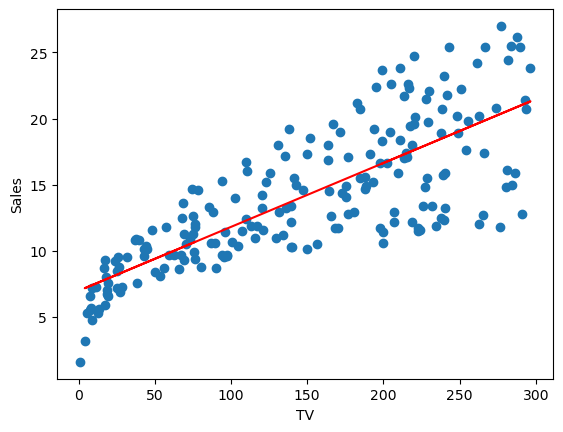

In [20]:
plt.scatter(data['TV'],data['Sales'])
plt.plot(X_train,lr.predict(X_train),color='red')
plt.xlabel('TV')
plt.ylabel('Sales')